In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract pillow

# Step 2: Import necessary libraries
from google.colab import files
from PIL import Image
import pytesseract as pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,415 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import os
print(os.listdir('drive/MyDrive/Cricket'))
# List all PNG files in the specified folder

folder_path = 'drive/MyDrive/Cricket'

file_names = [f for f in os.listdir(folder_path) if f.endswith('.png')]


# Initialize an empty list to store the extracted text
corpus = []

# Iterate through each PNG file and extract text
for file_name in file_names:
    # Full path to the image file
    image_path = os.path.join(folder_path, file_name)

    # Open the image file
    img = Image.open(image_path)

    # Use pytesseract to extract text from the image
    text = pytesseract.image_to_string(img)

    # Print the extracted text (for debugging purposes)
    print(f"Extracted Text from {file_name}:")

    # Append the extracted text to the corpus
    corpus.append(text)

In [ ]:
def split_corpus_on_at_symbol(rawtext):
    post_pattern = re.compile(r'(@\w+[-_]?\w*\s*-\s*\w+\s+\d{1,2})(.*?)(?=@\w+[-_]?\w*\s*-\s*\w+\s+\d{1,2}|\Z)', re.DOTALL)

    # Find all matches of the pattern
    matches = post_pattern.findall(rawtext)

    posts = []
    for match in matches:
        # Clean up the post by removing metadata at the end
        post_content = match[1]
        clean_post = re.sub(r'\d+\s[Vv]\d+.*', '', post_content).strip()
        posts.append(clean_post)

    return posts

In [ ]:
import re
blocks = []
for i in corpus:
  text_blobs = split_corpus_on_at_symbol(i)
  blocks.append(text_blobs)


In [ ]:
# Print each block
import pandas as pd
import matplotlib.pyplot as plt

tweet_corpus = []
for i, block in enumerate(blocks):
  for something in enumerate(block):
    tweet_corpus.append(something)
df = pd.DataFrame(tweet_corpus, columns=['something','Extracted_Text'])
df_2 = pd.DataFrame(df['Extracted_Text'])

In [ ]:
df_2

,Extracted_Text
0,"What a finalll! Congrats, India, and well play..."
1,Jasprit Bumrah finished an entire T20 World Cu...
2,Someone at hotstar had the good sense to not c...
3,2014 T20 WC Final: Lost\n\n2015 WC Semis: Lost...
4,Fuck cricket.\n\nNo body in developed world wa...
...,...
1461,Most times top scoring in ICC finals\n\nKohli ...
1462,Kohli did not say that@9 @9 9\n\n° ua 910 thi ...
1463,Rohit Sharma: “after all these years of playin...
1464,rohit sharma laying on the ground after we won...


In [ ]:
import re
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')


removal_stopwords = {'Replying','thy','tht', 'thi', 'tha',"shy","tris",'repli','others','replying','that'}
additional_stopwords = {"not"}

custom_stopwords = set(stopwords.words('english')).union(removal_stopwords).difference(additional_stopwords)

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


# Function to clean the text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word.lower() not in custom_stopwords]  # Remove stopwords
    tokens = [word for word in tokens if not re.search(r'\d{2,}', word)]  # Remove words with more than 2 digits
    tokens = [word for word in tokens if len(word) > 2]  # Remove two-letter words
    tokens = [word for word in tokens if not re.search(r'\w*\d\w*', word)]  # Remove alphanumeric words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize the tokens
    tokens = [stemmer.stem(word) for word in tokens]  # Stem the tokens
    return ' '.join(tokens)

df_2['cleaned_text'] = df_2['Extracted_Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


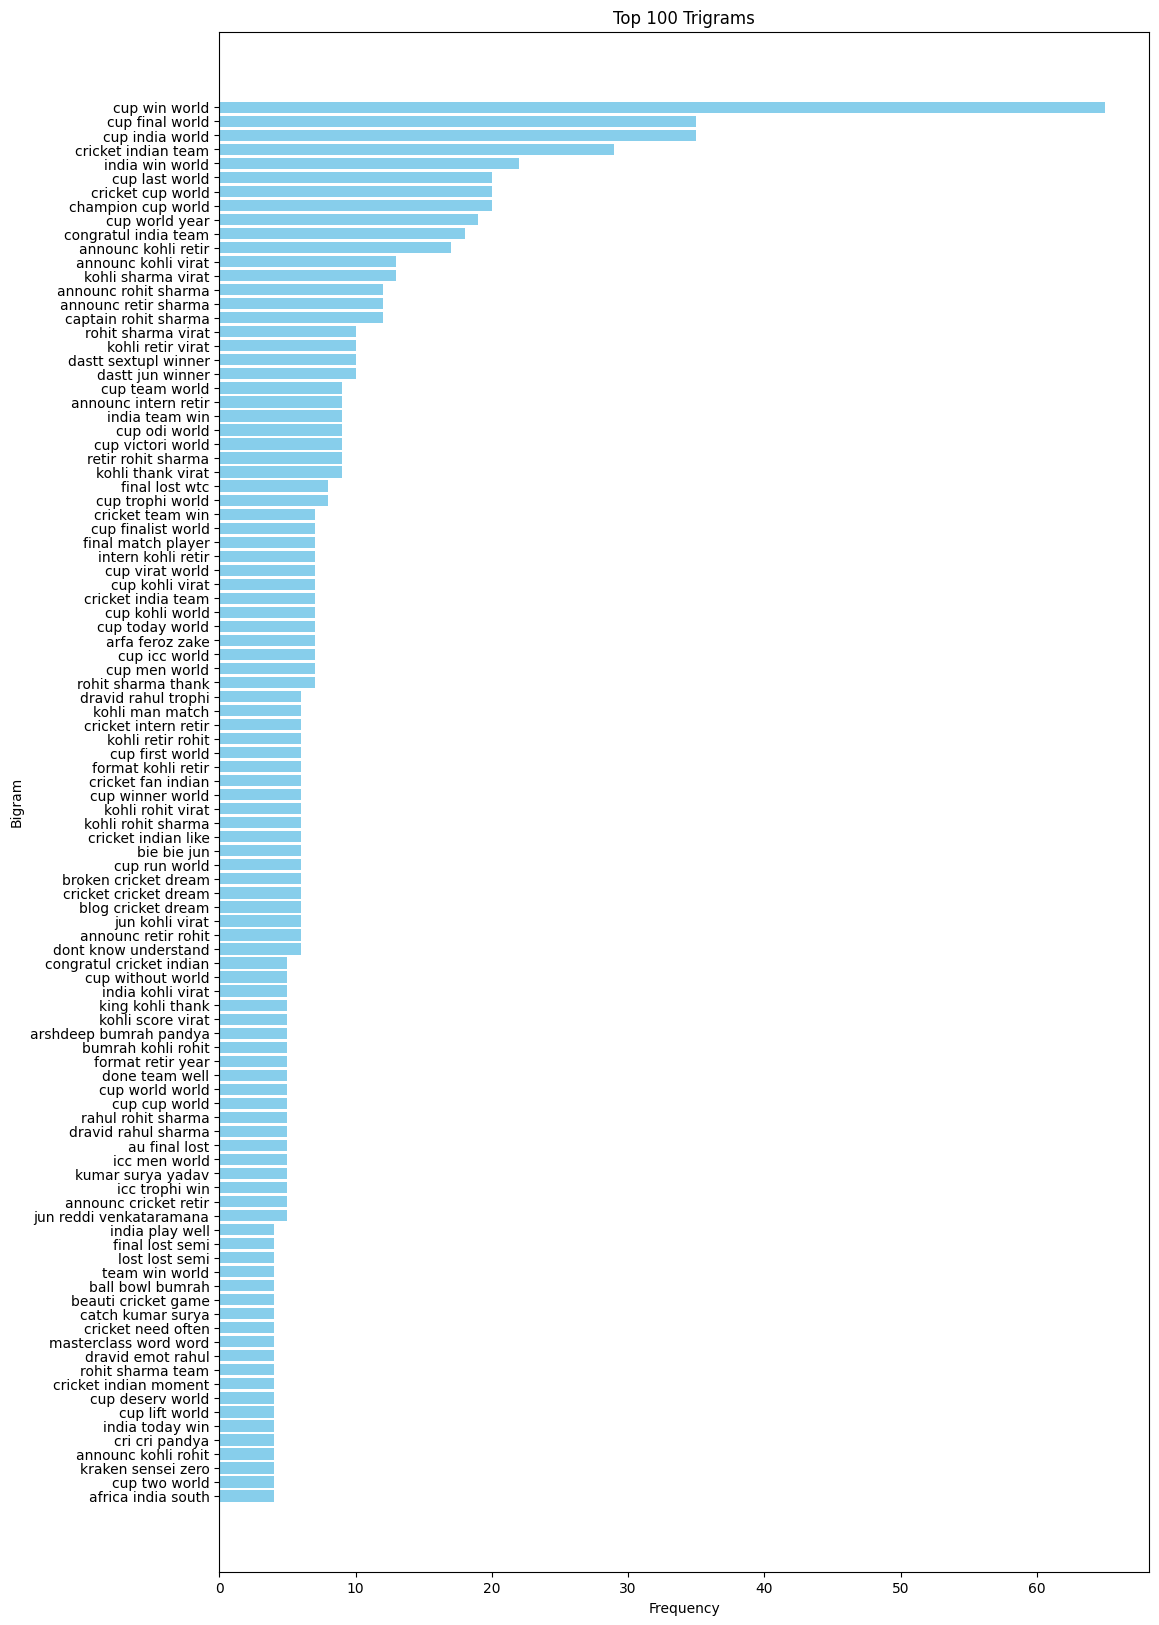

In [ ]:
from collections import Counter
from nltk import ngrams

# Function to generate bigrams
def get_bigrams(text):
    tokens = word_tokenize(text)
    bigrams = list(ngrams(tokens, 3))
    return bigrams

# Apply the function to the cleaned text
df_2['bigrams'] = df_2['cleaned_text'].apply(get_bigrams)

def canonicalize_bigram(bigram):
    return tuple(sorted(bigram))

# Canonicalize and count bigrams
all_bigrams = [canonicalize_bigram(bigram) for bigrams_list in df_2['bigrams'] for bigram in bigrams_list]
bigram_freq = Counter(all_bigrams)

# Get the top N bigrams
top_n = 100
top_bigrams = bigram_freq.most_common(top_n)

# Plot the bigrams
bigrams, counts = zip(*top_bigrams)
bigrams = [' '.join(bigram) for bigram in bigrams]

plt.figure(figsize=(12, 20))
plt.barh(bigrams, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 100 Trigrams')
plt.gca().invert_yaxis()
plt.show()

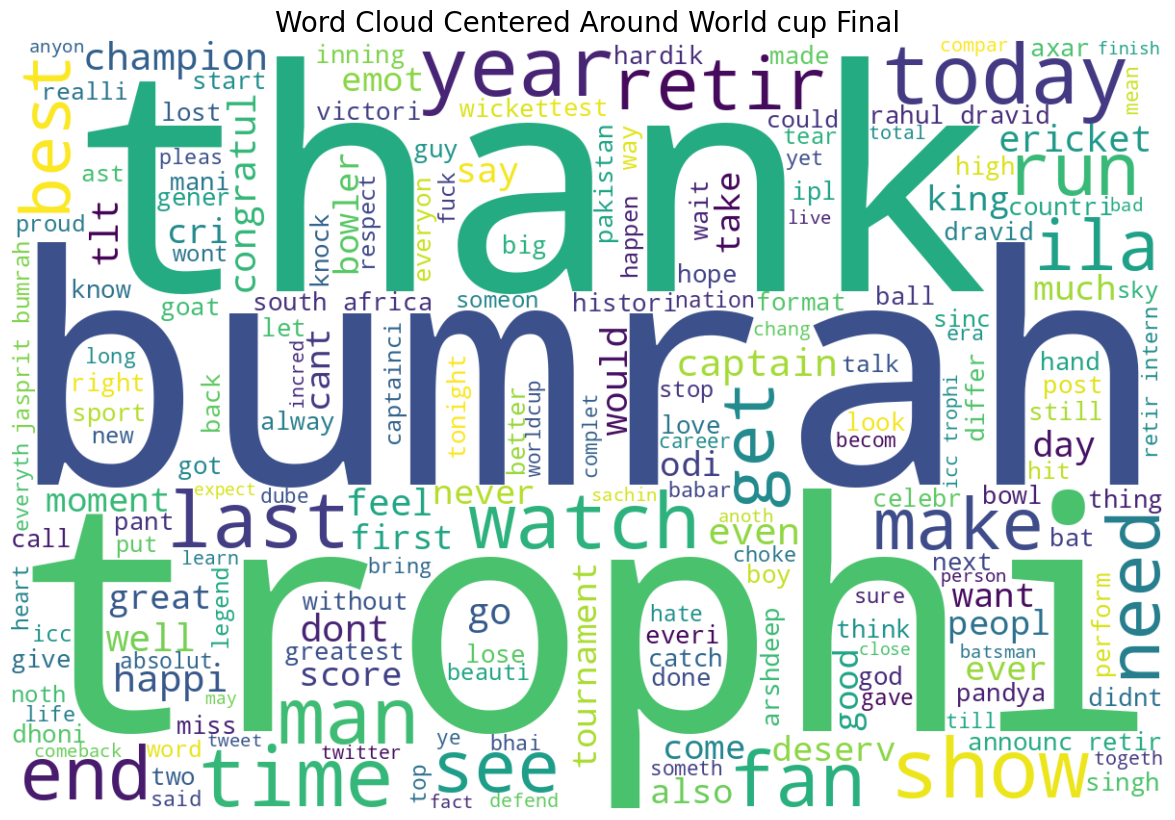

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Join all cleaned text into a single string
all_text = ' '.join(df_2['cleaned_text'])

# Define additional words to exclude
exclude_words = {"cricket", "world", "cup", "jun", "india", "final", "team", "play", "win", "indian", "virat", "game","not","kohli","rohit","sharma","one","match","player","like"}
custom_stopwords.update(exclude_words)

# Filter the text to exclude the specified words
filtered_text = ' '.join([word for word in all_text.split() if word not in custom_stopwords])

# Generate the word cloud
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    stopwords=custom_stopwords,
    max_words=200,
    colormap='viridis',
    contour_width=1,
    contour_color='steelblue'
).generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Centered Around World cup Final', fontsize=20)
plt.show()


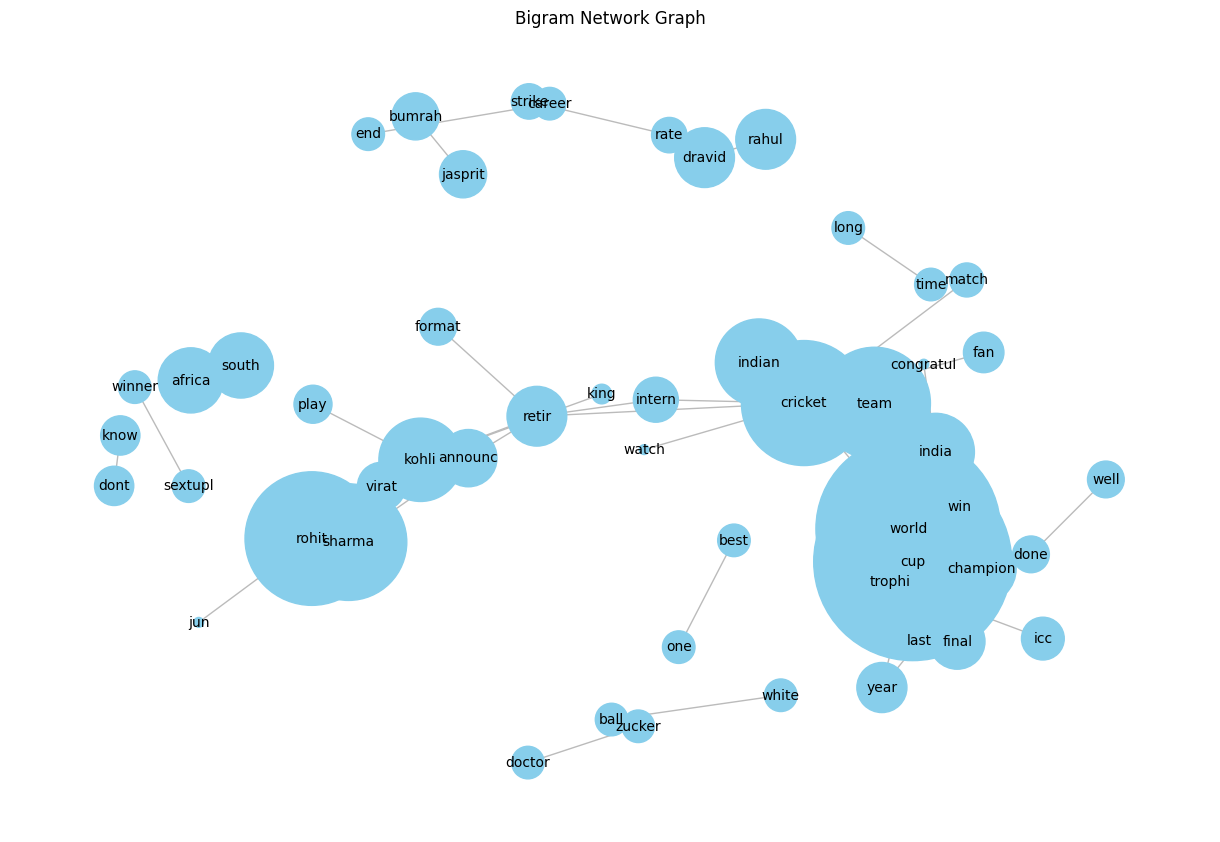

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph from the bigrams
G = nx.Graph()


for bigram, count in bigram_counts.items():
    if count > 10:  # Only include bigrams that appear more than once
        G.add_edge(bigram[0], bigram[1], weight=count)

# Calculate the total counts for each node
node_counts = {}
for node1, node2 in G.edges():
    node_counts[node1] = node_counts.get(node1, 0) + bigram_counts[(node1, node2)]
    node_counts[node2] = node_counts.get(node2, 0) + bigram_counts[(node1, node2)]

# Set the node sizes based on the counts
node_sizes = [node_counts[node] * 50 for node in G.nodes()]  # Multiply by 50 to scale up the sizes

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1.1)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, edge_color='#BBBBBB')
plt.title('Bigram Network Graph')
plt.show()